<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/06proyecto/TS_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Introducción a Series de Tiempo con Python

Este documento está diseñado para personas que conocen machine learning supervisado y no supervisado, pero que se inician en el análisis de series de tiempo. Incluye teoría clara y ejemplos prácticos en Python.

---

## 📌 ¿Qué es una serie de tiempo?

Una serie de tiempo es una secuencia de observaciones registradas a lo largo del tiempo, en intervalos regulares.

### 📊 Ejemplos:
- Temperatura diaria.
- Ventas mensuales.
- Precio de acciones por minuto.

A diferencia del ML tradicional, en series de tiempo el **orden de los datos importa**.

---

## 🧩 Componentes de una serie de tiempo

1. **Tendencia (T)**: Cambio a largo plazo (sube o baja).
2. **Estacionalidad (S)**: Patrones repetitivos.
3. **Ciclos (C)**: Fluctuaciones no regulares.
4. **Ruido (R)**: Variaciones aleatorias.

Modelo aditivo: `Serie = T + S + R`

---

## 🧪 Flujo de análisis

1. Cargar y visualizar la serie.
2. Descomposición.
3. Análisis de autocorrelaciones.
4. Modelado (ARIMA).
5. Pronóstico.
6. Evaluación.

---

## 🧰 Librerías necesarias

```python
pip install pandas matplotlib statsmodels pmdarima
```

---

## 1️⃣ Cargar y visualizar datos

```python
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar datos de ejemplo
data = sm.datasets.get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

# Visualización
data.plot(title="Pasajeros aéreos mensuales")
plt.ylabel("Pasajeros")
plt.show()
```

---

## 2️⃣ Descomposición de la serie

```python
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['value'], model='multiplicative')
result.plot()
plt.show()
```

---

## 3️⃣ Autocorrelaciones (ACF y PACF)

```python
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['value'])
plt.show()

plot_pacf(data['value'])
plt.show()
```

---

## 4️⃣ Modelado con ARIMA (auto.arima)

```python
import pmdarima as pm

# Modelado automático
model = pm.auto_arima(data['value'], seasonal=True, m=12, trace=True)
print(model.summary())
```

---

## 5️⃣ Pronóstico

```python
# Pronóstico de 12 meses
n_periods = 12
forecast = model.predict(n_periods=n_periods)

# Crear índice de fechas
future_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')
forecast_series = pd.Series(forecast, index=future_index)

# Visualizar
plt.plot(data['value'], label="Histórico")
plt.plot(forecast_series, label="Pronóstico", linestyle="--")
plt.legend()
plt.title("Pronóstico de pasajeros aéreos")
plt.show()
```

---

## 📌 Evaluación del modelo

Idealmente se divide el dataset en entrenamiento y validación. Algunas métricas útiles:

- MAE (error absoluto medio)
- RMSE (raíz del error cuadrático medio)

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Supongamos que tienes datos reales 'y_test' y predicciones 'y_pred':
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
```

---

## ✅ Conclusiones

- Las series de tiempo necesitan respetar la secuencia temporal.
- Hay que analizar la dependencia temporal (ACF/PACF).
- Modelos como ARIMA permiten capturar tendencia, estacionalidad y ruido.
- El pronóstico es útil para planificación, control y análisis.

---

¿Listo para seguir con Prophet o modelos más avanzados? Revisa `Facebook Prophet`, `NeuralProphet` o `Darts` para redes neuronales en series de tiempo.


In [1]:
!pip install pandas matplotlib statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.0 MB/s eta 0:00:00


/tmp/ipython-input-2-2503968470.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


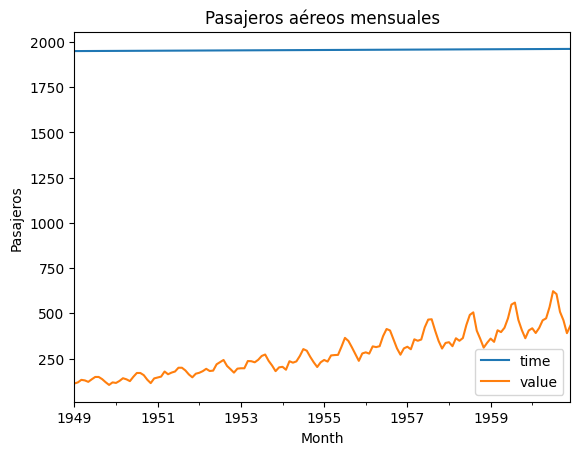

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar datos de ejemplo
data = sm.datasets.get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

# Visualización
data.plot(title="Pasajeros aéreos mensuales")
plt.ylabel("Pasajeros")
plt.show()

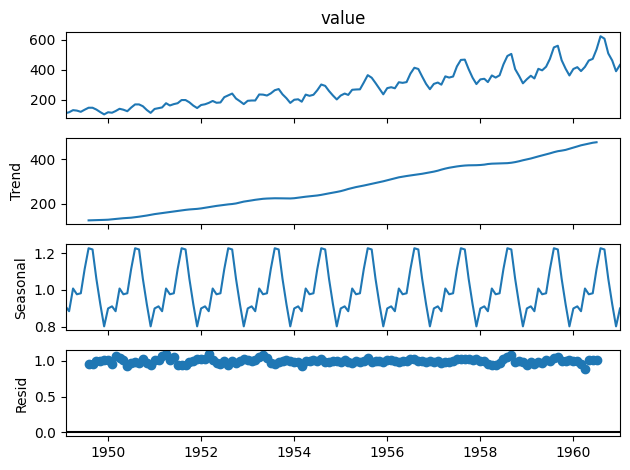

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['value'], model='multiplicative')
result.plot()
plt.show()

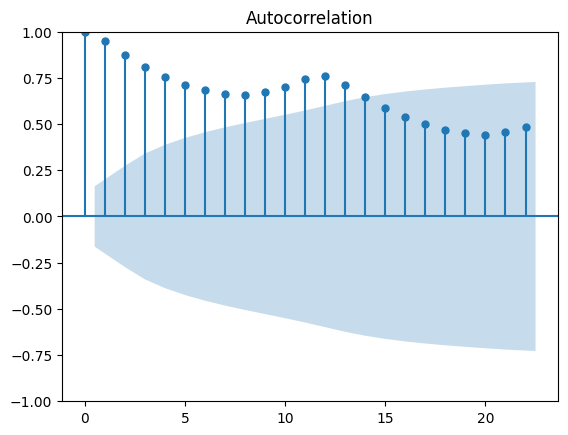

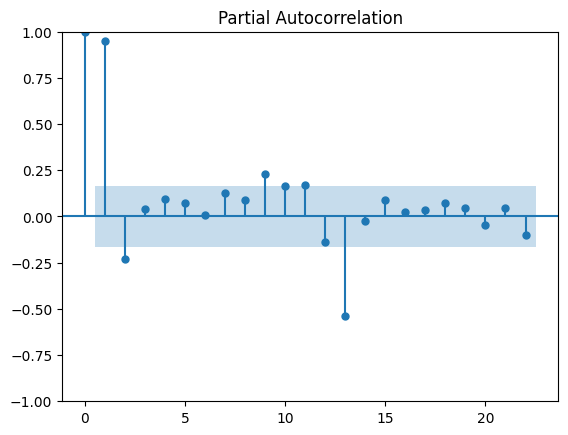

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['value'])
plt.show()

plot_pacf(data['value'])
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['value'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Pronóstico
forecast = model_fit.forecast(steps=12)
print(forecast)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 24 Jul 2025   AIC                           1394.683
Time:                        19:55:48   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0